In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = [10, 6]

dataset_original = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv")
dataset_original

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


Panormaica generale sui dati.

In [ ]:
dataset = dataset_original.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


**Quesito:**

in quale nazione si sono verificati più incidenti?

Utilizzo del metodo value_counts() per il conteggio delle frequenze, dal momento che ad ogni osservazione corrisponde un caso di incidente aereo.

In [ ]:
dataset["country"].value_counts()

country
USA                4377
Russia             1422
Unknown country     838
U.K.                837
Canada              826
                   ... 
Reunion               1
Cook Isl.             1
Guinea-Bissau         1
Monaco                1
Macau                 1
Name: count, Length: 232, dtype: int64

Sostituzione delle osservazioni che non sono portatrici di informazione non avendo il nome del paese ("Unknown country") con degli elementi NaN, per poi essere escluse con il metodo dropna().

In [ ]:
country_cleared = dataset["country"].apply(lambda x: np.nan if x == "Unknown country" else x)
country_cleared = country_cleared.dropna()
country_cleared.value_counts()

country
USA               4377
Russia            1422
U.K.               837
Canada             826
India              700
                  ... 
Christmas Isl.       1
Mauritius            1
Tonga                1
Monaco               1
Macau                1
Name: count, Length: 231, dtype: int64

Creazione del grafico a barre considerando i primi 10 valori raggruppati dal metodo value_counts() che di default ordina i risultati in ordine decrescente in base al conteggio.

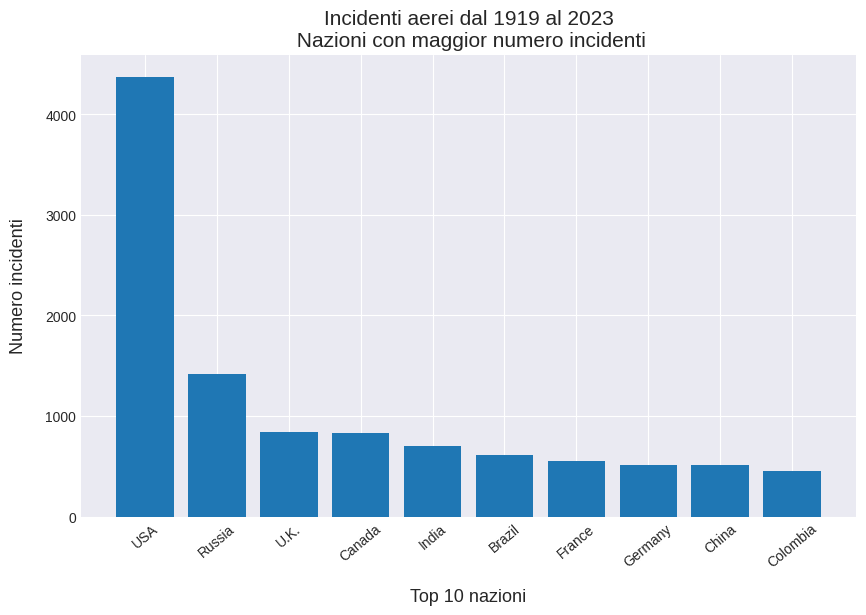

In [ ]:
country_freq = country_cleared.value_counts()

x = country_freq.index[:10]
y = country_freq[:10]

plt.bar(x, y)

plt.title("Incidenti aerei dal 1919 al 2023\n Nazioni con maggior numero incidenti", size=15)
plt.xlabel("Top 10 nazioni", labelpad=13, size=13)
plt.ylabel("Numero incidenti", labelpad=13, size=13)
plt.xticks(rotation=40);

**Quesito:**

gli incidenti avvengono più di frequente durante determinati giorni della settimana?

Nell codice sottostante si può vedere che nella colonna "date" sono contenuti valori non del formato data, di vario genere (??-???-1923).

In [ ]:
dataset.loc[:85, "date"]

0       date unk.
1       date unk.
2       date unk.
3       date unk.
4       date unk.
         ...     
81    15-JUL-1923
82    27-AUG-1923
83    03-DEC-1923
84    ??-???-1923
85    22-JAN-1924
Name: date, Length: 86, dtype: object

Trasfromazione dei valori della colonna "date" in oggetti datatime.
Passando (errors="coerce") vengono trasformati in "NaT" tutte le stringhe che non rispettano il formato data, gli stessi potranno essere eliminati come elementi NaN.

In [ ]:
dataset["date"] = pd.to_datetime(dataset["date"], format="%d-%b-%Y", errors="coerce")
dataset.loc[:85, "date"]

0           NaT
1           NaT
2           NaT
3           NaT
4           NaT
        ...    
81   1923-07-15
82   1923-08-27
83   1923-12-03
84          NaT
85   1924-01-22
Name: date, Length: 86, dtype: datetime64[ns]

In [ ]:
print(dataset["date"].dtype)

datetime64[ns]


Creazione di nuove colonne nelle quali le date (oggetti datatime) vengono convertite in giorni (valori tra 0 e 6), che vengono convertiti a loro volta in giorni espressi in lettere tramite il metodo map().

In [ ]:
giorni_ita_dict = {0: "Lunedì", 1: "Martedì", 2: "Mercoledì", 3: "Giovedì", 4: "Venerdì", 5: "Sabato", 6: "Domenica"}

dataset["day"] = dataset["date"].dt.dayofweek
dataset["day_name"] = dataset["day"].map(giorni_ita_dict)
dataset["day_name"]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
23962     Giovedì
23963     Giovedì
23964     Venerdì
23965    Domenica
23966      Lunedì
Name: day_name, Length: 23967, dtype: object

Rimozione dei valori NaN.

In [ ]:
day_name_cleared = dataset["day_name"].dropna()
day_name_cleared.isna().sum()

0

Utilizzo del metodo value_counts() per il conteggio delle frequenze.

In [ ]:
day_name_cleared.value_counts()

day_name
Venerdì      3701
Giovedì      3516
Mercoledì    3491
Martedì      3444
Lunedì       3317
Sabato       3186
Domenica     2753
Name: count, dtype: int64

Creazione del grafico a barre che mostra i giorni della settimana con le rispettive frequenze d'incidenti aerei.

Storicamente il giorno con maggior incidenti è il Venerdì.

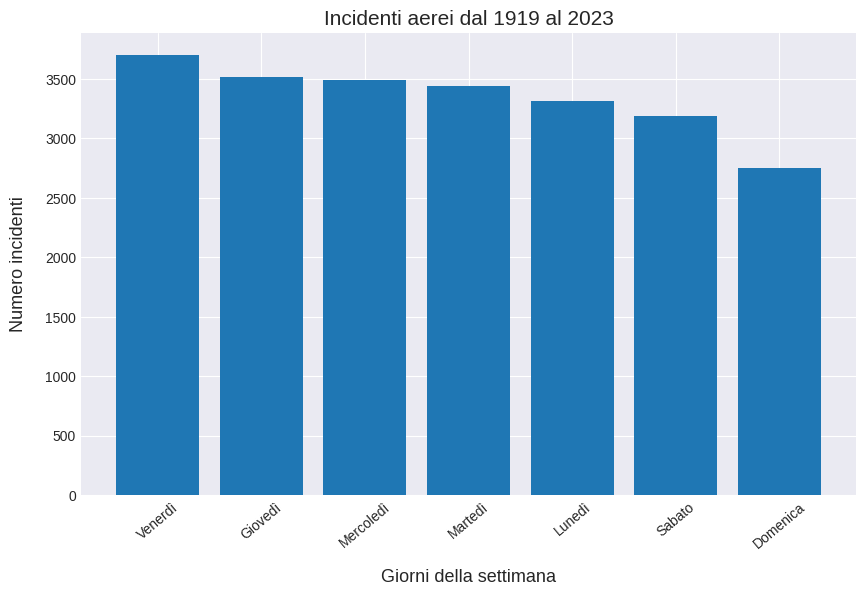

In [ ]:
day_name_freq = day_name_cleared.value_counts()

x = day_name_freq.index
y = day_name_freq

plt.bar(x, y)

plt.title("Incidenti aerei dal 1919 al 2023", size=15)
plt.xlabel("Giorni della settimana", labelpad=13, size=13)
plt.ylabel("Numero incidenti", labelpad=13, size=13)
plt.xticks(rotation=40);

**Quesito:**

quali sono gli operatori più sicuri?

Gli operatori di volo più sicuri saranno quell che risponderanno a due caratteristiche: minor numero di incidenti aerei e minor numero di morti per incidente.

Creazione di una maschera booleana per filtrare solo le osservazioni con valori uguali a zero della variabile "fatalities" e mantenere le rispettive osservazioni della variabile "operator" (minor numero di morti per incidente).

In [ ]:
operator_fatalities = dataset[dataset["fatalities"] == "0"][["operator", "fatalities"]]
operator_fatalities

,operator,fatalities
4,Soviet AF,0
7,Aeroflot,0
8,Russian AF,0
9,Soviet AF,0
10,Russian AF,0
...,...,...
23960,Dimonim Air,0
23962,Angkasa Super Services,0
23963,Nasional Global Aviasi,0
23964,Bar Aviation,0


Identificazioni valori NaN.

In [ ]:
operator_fatalities.isna().sum()

operator      3
fatalities    0
dtype: int64

Rimozione dei valori NaN.

In [ ]:
operator_fatalities = operator_fatalities.dropna()
operator_fatalities.isna().sum()

operator      0
fatalities    0
dtype: int64

Utilizzo nuovamente del metodo value_counts() per conteggiare la frequenza degli incidenti a parità di mortalità nulla.

In [ ]:
operator_fatalities.value_counts()

operator                            fatalities
RAF                                 0             378
USAF                                0             337
private                             0             202
USAAF                               0             202
US Navy                             0             151
                                                 ... 
Fred-Air                            0               1
Freedom Airline                     0               1
Freight Air, lsf USAF               0               1
French AF, lsf Civil Air Transport  0               1
ÃLAG                               0               1
Name: count, Length: 4117, dtype: int64

Creazione di una maschera booleana per filtrare solo le osservazioni con frequenza minima (minor numero di incidenti aerei).

In [ ]:
mask = operator_fatalities.value_counts() == 1
safe_operators = operator_fatalities.value_counts()[mask]
safe_operators

operator                                 fatalities
Pinnacle Air Charter                     0             1
Plane Speaker Corporation                0             1
Pws Air Llc                              0             1
Regional Express AmÃ©ricas, opf Avianca  0             1
Ray Geophysical                          0             1
                                                      ..
Fred-Air                                 0             1
Freedom Airline                          0             1
Freight Air, lsf USAF                    0             1
French AF, lsf Civil Air Transport       0             1
ÃLAG                                    0             1
Name: count, Length: 2911, dtype: int64

Il risultato mostra che ci sono 2911 operatori che rispettano le caratteristiche per essere definiti sicuri, considerando la grande numerosità verrano estratti solo i primi 10 a scopo dimostrativo.

In [ ]:
operation_list = []
for name in safe_operators.index[:10]:
    operation_list.append(name[0])

operation_list

['Pinnacle Air Charter',
 'Plane Speaker Corporation',
 'Pws Air Llc',
 'Regional Express AmÃ©ricas, opf Avianca',
 'Ray Geophysical',
 'Pinnacle Airlines, op.for Northwest Airlink',
 'Pinnacle Airlines',
 'Province of Saskatchewan',
 'Ptarmigan Airlines',
 'Pinehurst Airlines, op.for Emery Worldwide']

Creazione del grafico a barre che mostra 10 operatori che rispettano le caratteristiche di sicurezza.

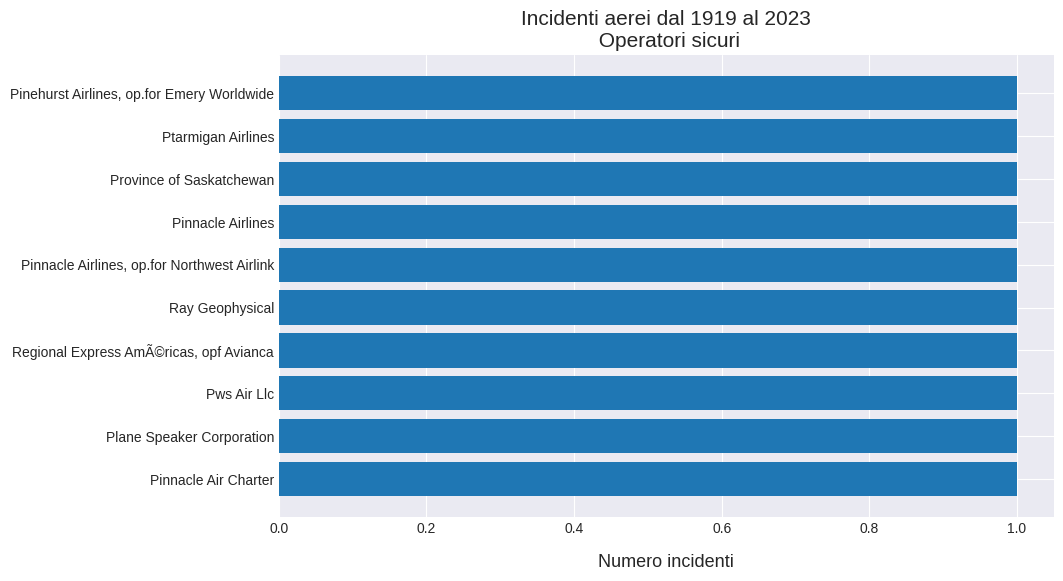

In [ ]:
fig, ax = plt.subplots()

y_pos = np.arange(len(safe_operators.index[:10]))

ax.set_yticks(y_pos, labels=operation_list)
ax.barh(y_pos, safe_operators[:10])

ax.set_xlabel("Numero incidenti", labelpad=13, size=13)
ax.set_title("Incidenti aerei dal 1919 al 2023\n Operatori sicuri", size=15);

**Quesito:**

quale tipo di velivolo ha causato più morti?

Identificazione e rimozione dei valor NaN.

In [ ]:
dataset["fatalities"].isna().sum()

3938

In [ ]:
fatalities_cleared = dataset["fatalities"].dropna()
fatalities_cleared.isna().sum()

0

Per ogni osservazione della variabile "fatalities" viene svolta la funzione eval() che permette di svolgere le operazioni nel momento che ci siano operatori matematici come "+" all'interno delle stringhe.

In [ ]:
fatalities_cleared = fatalities_cleared.apply(lambda x: eval(x))

Ordinamento crescente delle osservazione e utlizzo del metodo tail() per identificare gli ultimi 10, quindi con valori maggiori.

In [ ]:
fatalities_sorted = fatalities_cleared.sort_values()
fatalities_10 = fatalities_sorted.tail(10)
fatalities_10

16114     290
22145     298
14364     301
18291     312
15454     329
13460     335
12694     346
15484     520
19404     965
19403    1692
Name: fatalities, dtype: int64

Utilizzo del metodo index sulle osservazioni della variabile "fatalities" per ottenere i medesimi indici delle osservazioni della variabile "type", cosi da ottenere i modelli dei velivoli ("type") che hanno il maggior numero di decessi ("fatalities").

In [ ]:
airplane_10 = dataset.loc[fatalities_sorted.tail(10).index, "type"]
airplane_10

16114              Airbus A300B2-203
22145               Boeing 777-2H6ER
14364    Lockheed L-1011 TriStar 200
18291                Boeing 747-168B
15454                Boeing 747-237B
13460                 Boeing 747-121
12694                       DC-10-10
15484                Boeing 747SR-46
19404                 Boeing 767-222
19403               Boeing 767-223ER
Name: type, dtype: object

Creazione del grafico a barre che mostra i primi 10 modelli con maggior numero di decessi.

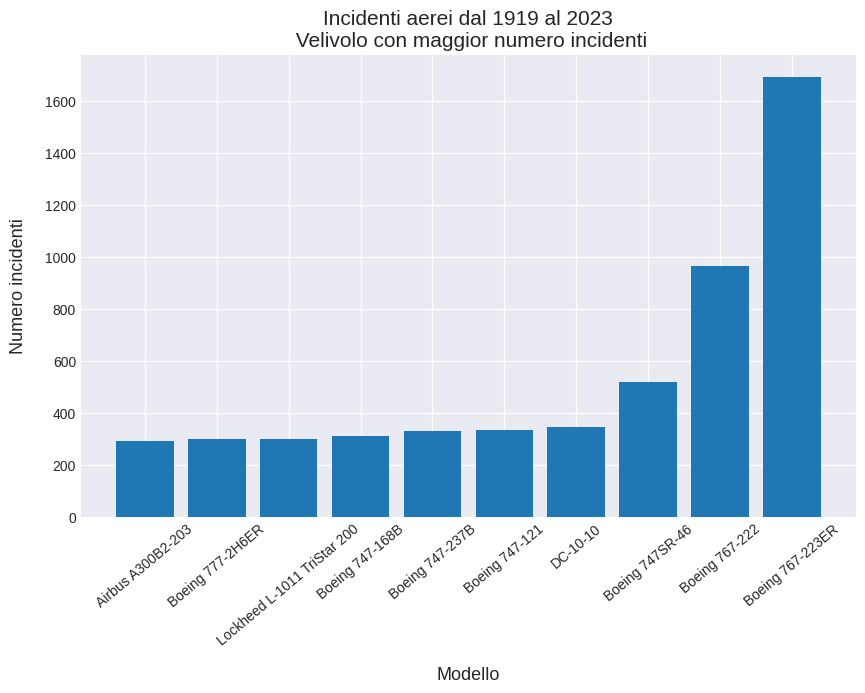

In [ ]:
x = airplane_10
y = fatalities_10

plt.bar(x, y)

plt.title("Incidenti aerei dal 1919 al 2023\n Velivolo con maggior numero incidenti", size=15)
plt.xlabel("Modello", labelpad=13, size=13)
plt.ylabel("Numero incidenti", labelpad=13, size=13)
plt.xticks(rotation=40);

**Quesito:**

come si sono evoluti gli incidenti dopo l'11 Settembre?

In [ ]:
dataset["date"]

0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
23962   2023-05-11
23963   2023-05-11
23964   2023-05-12
23965   2023-05-14
23966   2023-05-15
Name: date, Length: 23967, dtype: datetime64[ns]

Dal momento che i valori nella colonna "date" sono stati precedentemente trasformati in oggetti datatime è possibile usare il metodo datatime.year() per estrarre solo gli anni, di seguito vengono eliminati gli elementi NaN.

In [ ]:
dataset["year"] = dataset["date"].dt.year
years = dataset["year"].dropna()
years.isna().sum()

0

Il metodo dt.year() restituisce il dato in tipo float, non utilizzabile per le successive manipolazioni, di conseguenza viene effettuato il casting per renderlo di tipo intero.

Con il metodo sort_index() le frequenze vengno ordinate in base agli anni in ordine crescente, necessario per la visualizzaione successiva.

In [ ]:
years = years.apply(lambda x: int(x))
years_sort = years.value_counts().sort_index()
years_sort

year
1919      2
1920      4
1921      7
1922      3
1923      7
       ... 
2019    245
2020    203
2021    182
2022    167
2023     56
Name: count, Length: 105, dtype: int64

Grafico a linea che mostra una prima panoramica degli incidenti aerei per il periodo dal 1919 al 2023.

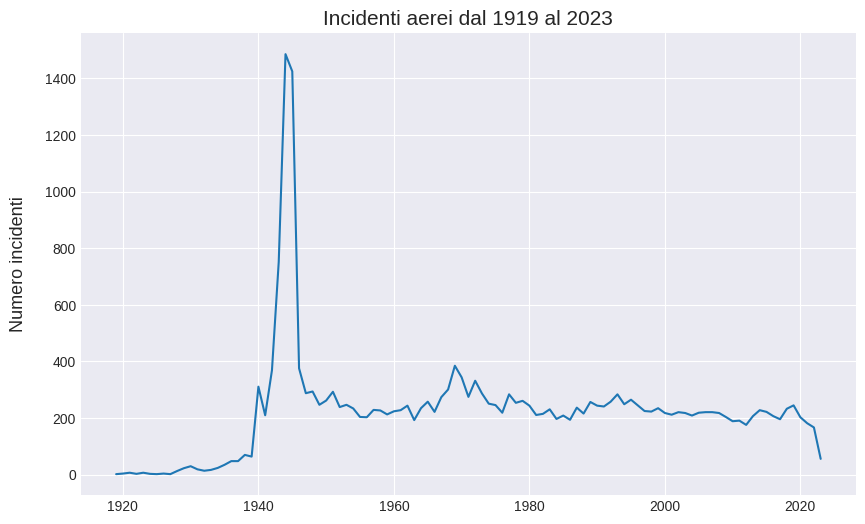

In [ ]:
x = years_sort.index
y = years_sort.values

plt.plot(x, y)

plt.title("Incidenti aerei dal 1919 al 2023", size=15)
plt.ylabel("Numero incidenti", labelpad=13, size=13);

Grafico a linea che mostra l'evolzione della frequenza degli incidenti aerei ristretti al periodo di tempo d'interesse.

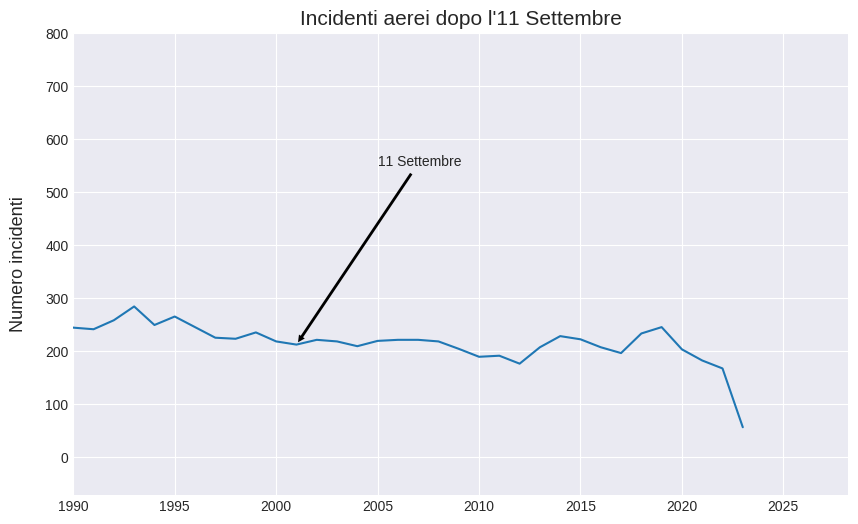

In [ ]:
x = years_sort.index
y = years_sort.values

plt.plot(x, y)

plt.title("Incidenti aerei dopo l'11 Settembre", size=15)
plt.ylabel("Numero incidenti", labelpad=13, size=13)

plt.ylim(ymax=800)
plt.xlim(xmin=1990)
plt.annotate("11 Settembre", xy=(2001, 212), xytext=(2005, 550), arrowprops=dict(linewidth =0.01, arrowstyle="simple", facecolor="black"));

Divisione del dataset utilizzando come spartiacque la data d'interesse (2001-09-11) per ulteriore esplorazione.

Per trarre le opportune inferenze è necessario considerare lo squilibrio della quantità dei dati, tendenti in maniera importante al periodo pre-11 Settembre.

In [ ]:
dataset_1919_to_2001 = dataset[dataset["date"] <= "2001-09-11"]["date"]

dataset_1919_to_2001_day_numer = dataset_1919_to_2001.dt.dayofweek


giorni_ita_dict = {0: "Lunedì", 1: "Martedì", 2: "Mercoledì", 3: "Giovedì", 4: "Venerdì", 5: "Sabato", 6: "Domenica"}

dataset_1919_to_2001_day = dataset_1919_to_2001_day_numer.map(giorni_ita_dict)

In [ ]:
dataset_2001_to_2023 = dataset[dataset["date"] > "2001-09-11"]["date"]
dataset_2001_to_2023_day_numer = dataset_2001_to_2023.dt.dayofweek

giorni_ita_dict = {0: "Lunedì", 1: "Martedì", 2: "Mercoledì", 3: "Giovedì", 4: "Venerdì", 5: "Sabato", 6: "Domenica"}

dataset_2001_to_2023_day = dataset_2001_to_2023_day_numer.map(giorni_ita_dict)

Grafico che mostra i giorni della settimana con le rispettive frequenze d'incidenti aerei prima dell'11 Settembre.

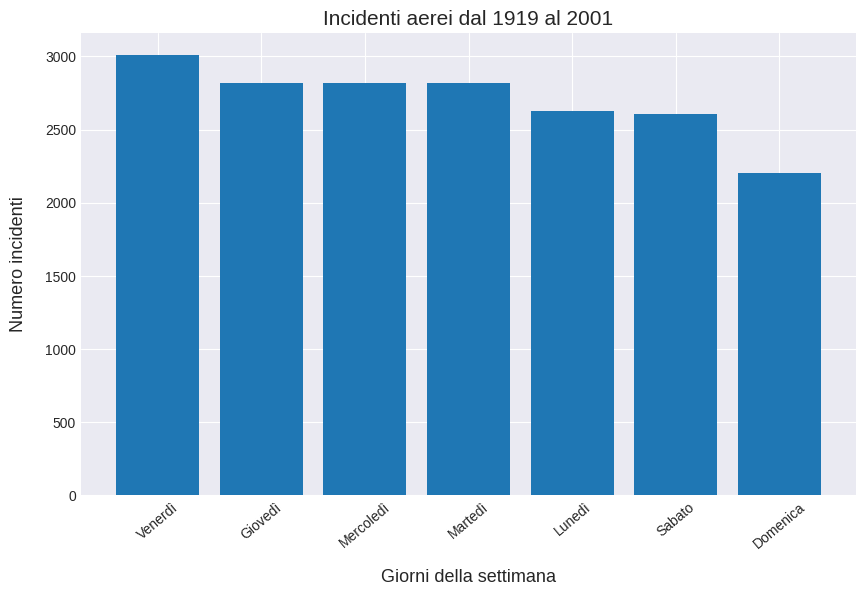

In [ ]:
x = dataset_1919_to_2001_day.value_counts().index
y = dataset_1919_to_2001_day.value_counts()

plt.bar(x, y)

plt.title("Incidenti aerei dal 1919 al 2001", size=15)
plt.xlabel("Giorni della settimana", labelpad=13, size=13)
plt.ylabel("Numero incidenti", labelpad=13, size=13)
plt.xticks(rotation=40);

Grafico che mostra i giorni della settimana con le rispettive frequenze d'incidenti aerei dopo l'11 Settembre.

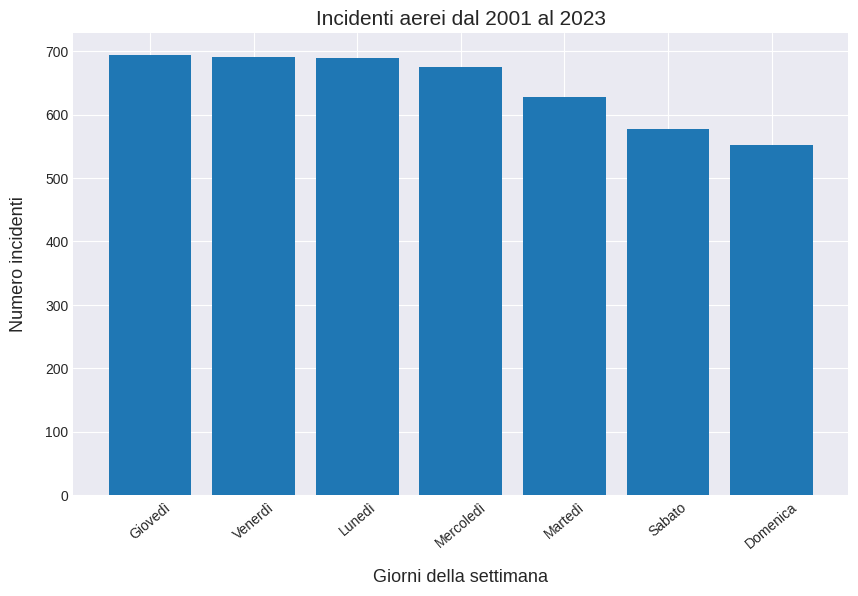

In [ ]:
x = dataset_2001_to_2023_day.value_counts().index
y = dataset_2001_to_2023_day.value_counts()

plt.bar(x, y)

plt.title("Incidenti aerei dal 2001 al 2023", size=15)
plt.xlabel("Giorni della settimana", labelpad=13, size=13)
plt.ylabel("Numero incidenti", labelpad=13, size=13)
plt.xticks(rotation=40);